In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import Counter
from wordcloud import WordCloud
import matplotlib.ticker as tick
%pylab inline
# warnings.filterwarnings("ignore");
from pandas import get_dummies
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.cluster import DBSCAN 
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

Populating the interactive namespace from numpy and matplotlib


In [2]:
Video_games_sales = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
Video_games_sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [3]:
Video_games_sales = Video_games_sales.dropna()
Video_games_sales['Year'] = Video_games_sales['Year_of_Release'].astype(int)
Video_games_sales["Platform" ] = Video_games_sales["Platform"].replace(
    ["GB", "NES", "DS", "X360", "SNES", "GBA", "3DS", "N64", "PS", "XB",
     "XOne", "PSV", "TG16", "3DO", "PCFX"],
    ["Game Boy", "Nintendo Entertainment System", "Nintendo DS", "Xbox 360",
     "Super Nintendo Entertainment System",
     "Nintendo Game Boy Advance", "Nintendo 3DS", "Nintendo 64","PlayStation",
     "Xbox","Xbox One", "PlayStation Vita", "TurboGrafx-16",
     "3DO Interactive Multiplayer", "NEC PC‑FX"])
Video_games_sales.loc[Video_games_sales['Name'] == "FIFA Soccer 13", "Genre"] = "Sports"

In [4]:
Video_games_sales_Pred = Video_games_sales.copy()
Video_games_sales.head()
Video_games_sales[:5]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,2006
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2008
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,2009
6,New Super Mario Bros.,Nintendo DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,2006
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,2006


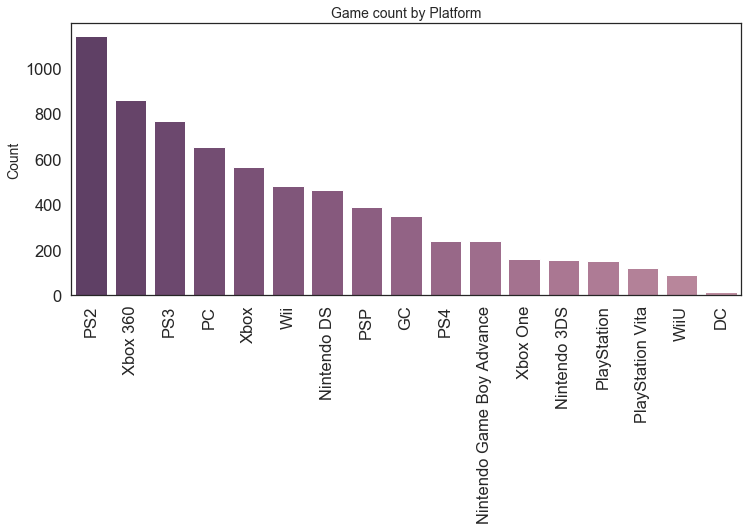

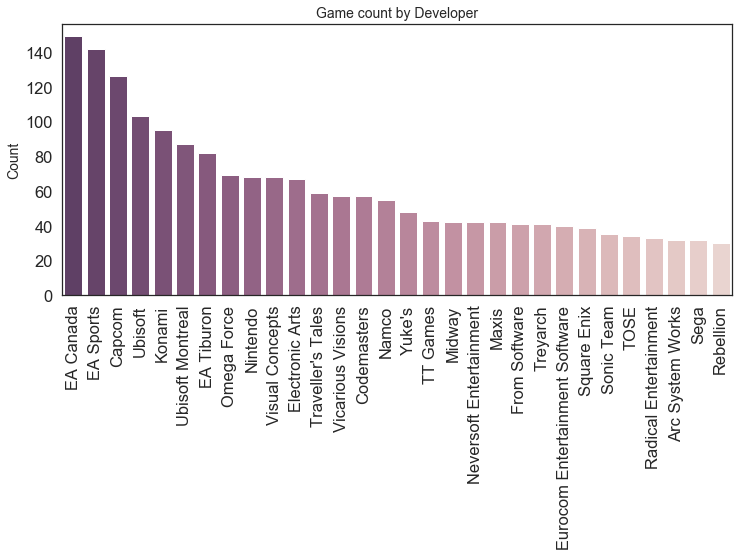

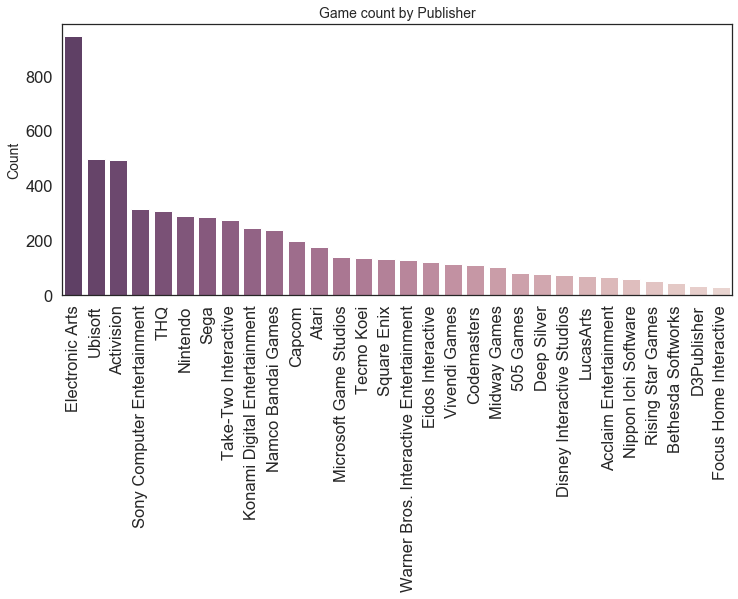

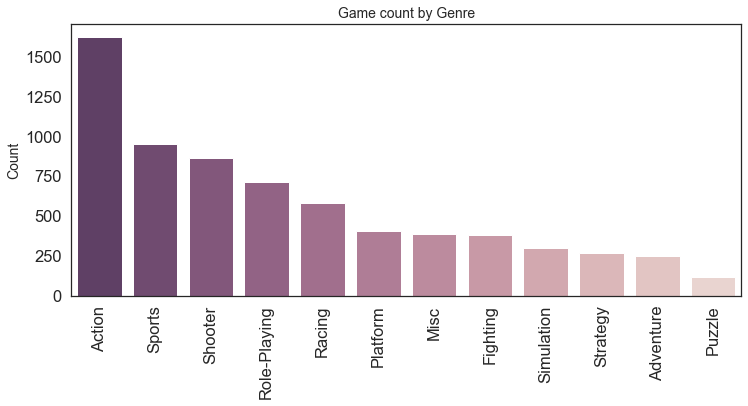

In [48]:
cols = ['Platform', 'Developer', 'Publisher', 'Genre']

for col in cols:
    chart = Video_games_sales_Pred[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('', fontsize = 14)
    plt.savefig('')

In [6]:
def Game_score_pred(score):
    if score >= 90:
        return '90-100'
    elif score >= 80:
        return '80-89'
    elif score >= 70:
        return '70-79'
    elif score >= 60:
        return '60-69'
    elif score >= 50:
        return '50-59'
    else:
        return '0-49'

In [7]:
Videogames_sales_hit_group = Video_games_sales.dropna(subset=['Critic_Score']).reset_index(drop=True)
Videogames_sales_hit_group['Game_score_pred_1'] = Videogames_sales_hit_group['Critic_Score'].apply(lambda x: Game_score_pred(x))


In [8]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
    
def width(x):
    if x == 'Platform':
        return 14.4
    elif x == 'Developer':
        return 13.2
    elif x == 'Publisher':
        return 11.3
    elif x == 'Genre':
        return 13.6

def height(x):
    if x == 'Genre':
        return 8
    else:
        return 9


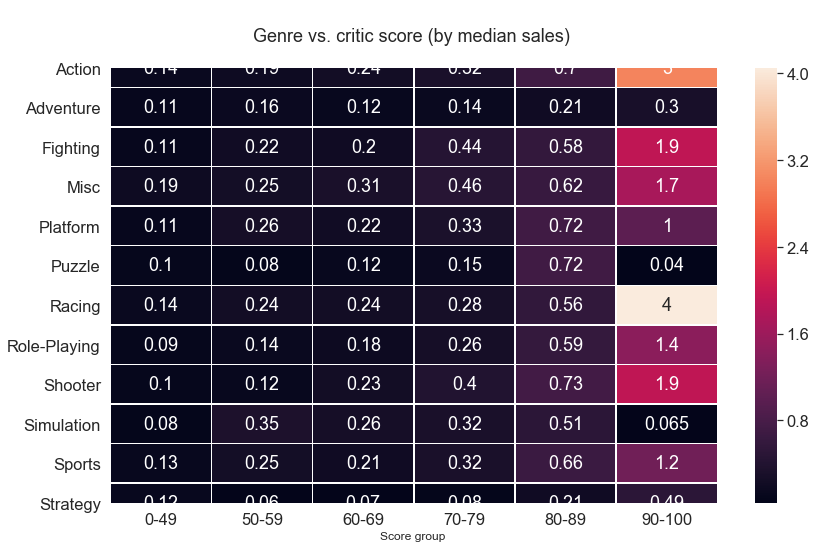

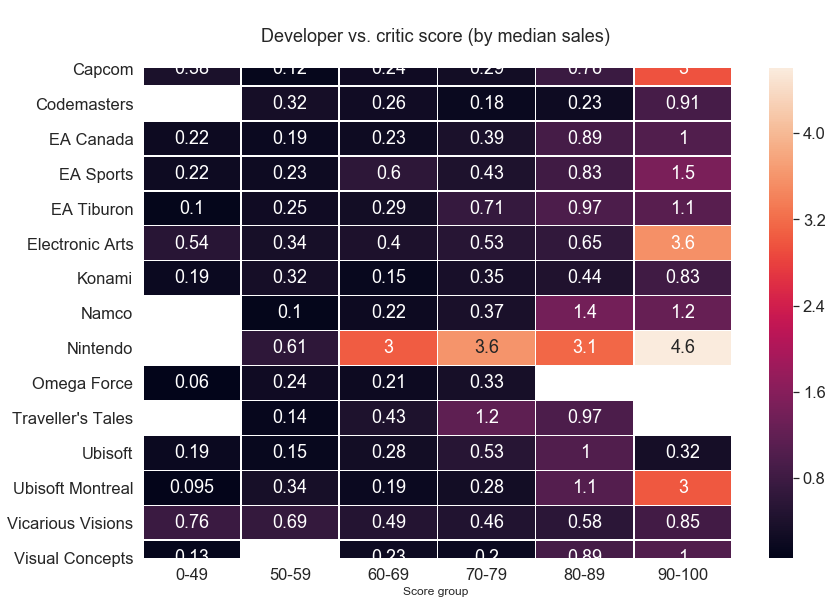

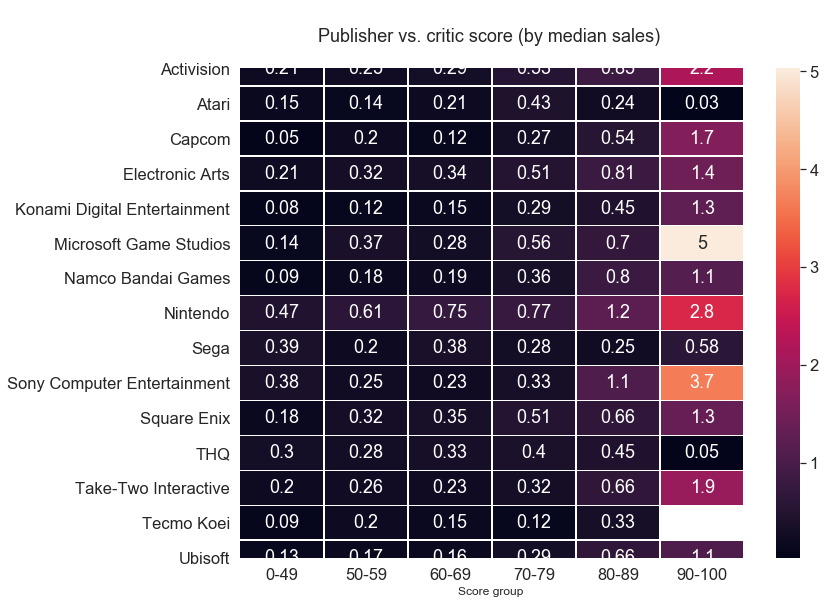

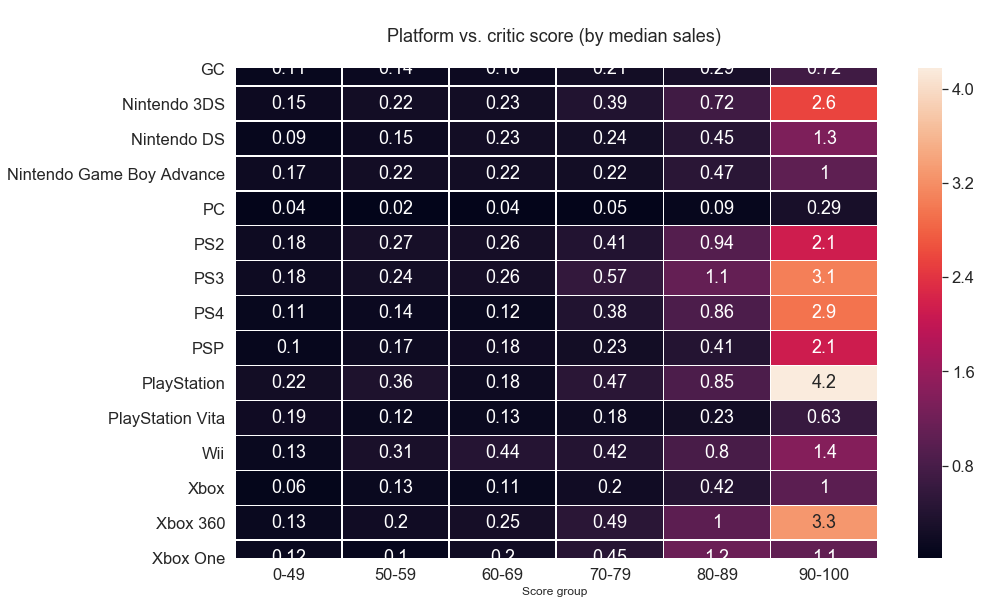

In [49]:
cols = ['Genre', 'Developer', 'Publisher', 'Platform']
for col in cols:
    pack = []
    top = Videogames_sales_hit_group[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    Videogames_sales_hit_group[col] = Videogames_sales_hit_group[col].apply(lambda x: in_top(x))
    Videogames_sales_hit_group_platform = Videogames_sales_hit_group[[col, 'Game_score_pred_1', 'Global_Sales']].groupby([col, 'Game_score_pred_1']).median().reset_index().pivot(col, "Game_score_pred_1", "Global_Sales")
    plt.figure(figsize=(width(col), height(col)))
    sns.heatmap(Videogames_sales_hit_group_platform, annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. critic score (by median sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('Score group \n', fontsize=12)
    plt.savefig('')
    pack = []

In [10]:
cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
for col in cols:
    uniques = Video_games_sales[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        Video_games_sales.loc[Video_games_sales[col] == k, col] = v

In [11]:
Video_games_sales1 = Video_games_sales[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
Video_games_sales1 = Video_games_sales1.dropna().reset_index(drop=True)
# Video_games_sales1 = Video_games_sales1.astype('float64')

In [12]:
PlayStation = ['PS3', 'PS4', 'PS2', 'PlayStation', 'PSP', 'PlayStation Vita']
Nintendo = ['Wii', 'Nintendo Entertainment System', 'Game Boy','Nintendo DS', 
            'Super Nintendo Entertainment System', 'Nintendo Game Boy Advance',
            'Nintendo 3DS', 'Nintendo 64','WiiU']
Microsoft = ['Xbox', 'Xbox One', 'Xbox 360']
Other = ['PC', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TurboGrafx-16', 
         '3DO Interactive Multiplayer', 'GG', 'NEC PC‑FX']

[(0, 17.5)]

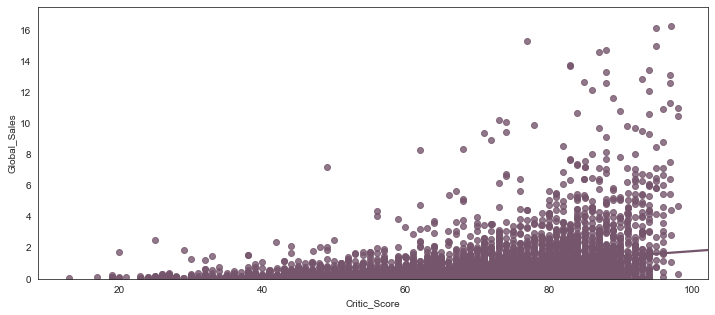

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=Video_games_sales1, ci=None, color="#75556c", x_jitter=.02).set(ylim=(0, 17.5))
plt.savefig('')

[(0, 4), (50, 95)]

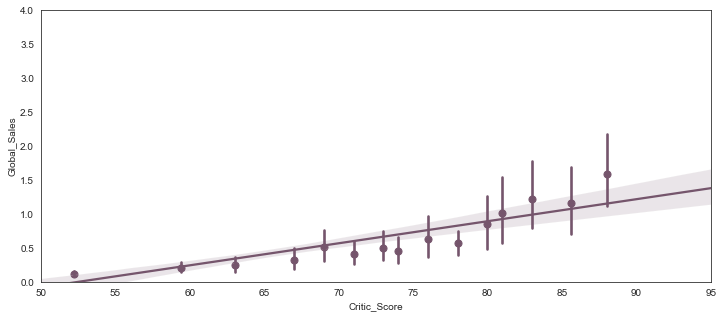

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=Video_games_sales1.loc[Video_games_sales1.Year_of_Release >= 2014],
            truncate=True, x_bins=15, color="#75556c").set(ylim=(0, 4), xlim=(50, 95))
plt.savefig('')

In [15]:
Video_games_sales_Pred_2 = Video_games_sales_Pred[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
Video_games_sales_Pred_2 = Video_games_sales_Pred_2.dropna().reset_index(drop=True)
Video_games_sales_Pred__2 = Video_games_sales_Pred_2[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
Video_games_sales_Pred__2['Hit'] = Video_games_sales_Pred__2['Global_Sales']
Video_games_sales_Pred__2.drop('Global_Sales', axis=1, inplace=True)

In [16]:
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

Video_games_sales_Pred__2['Hit'] = Video_games_sales_Pred__2['Hit'].apply(lambda x: hit(x))

In [17]:
Video_games_sales_Pred__2[:5]
Video_games_sales_Pred__2_copy = pd.get_dummies(Video_games_sales_Pred__2)
Video_games_sales_Pred__3 = Video_games_sales_Pred__2_copy
Values_hit = Video_games_sales_Pred__3['Hit'].values
Video_games_sales_Pred__3 = Video_games_sales_Pred__3.drop(['Hit'],axis=1)
X = Video_games_sales_Pred__3.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Values_hit, test_size=0.60, random_state=2)

In [18]:
radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))

C:\Users\happy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation accuracy:  0.8327228327228328


In [19]:
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_val_2 = log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.8417582417582418


C:\Users\happy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
lin_reg = CalibratedClassifierCV().fit(Xtrain, ytrain)
y_val_3 = lin_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_3).idxmax(axis=1).values
                                   == ytest)/len(ytest))

C:\Users\happy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\happy\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\happy\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Validation accuracy:  0.8117216117216117


C:\Users\happy\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
Gau_NB = GaussianNB().fit(Xtrain, ytrain)
y_val_4 = Gau_NB.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_4).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.30964590964590966


In [22]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
from sklearn import metrics
print(" Validation Accuracy:",metrics.accuracy_score(ytest, y_pred))

 Validation Accuracy: 0.8361416361416362


In [23]:
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(Xtrain, ytrain)
y_pred = clf2.predict(Xtest)
print("Validation Accuracy:",metrics.accuracy_score(ytest, y_pred))

Validation Accuracy: 0.8185592185592185


C:\Users\happy\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\happy\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Validation Accuracy: 0.1741147741147741
Total Clusters:  410
Validation Accuracy: 0.7914529914529914
Total Clusters:  30


Text(0.5, 1.0, 'DBSCAN')

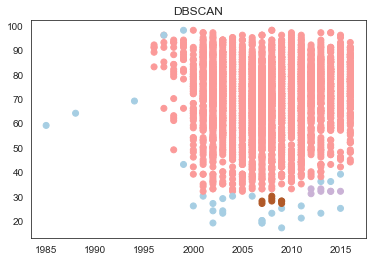

In [24]:
clf3 = LocalOutlierFactor(n_neighbors=130)
clf3.fit(Xtrain, ytrain)
y_pred = clf3.fit_predict(Xtest)
print("Validation Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Total Clusters: ", list(y_pred).count(-1))

clf4 = DBSCAN(min_samples = 5, eps= 3)
clf4.fit(Xtrain, ytrain)
y_pred = clf4.fit_predict(Xtest)
print("Validation Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Total Clusters: ", list(y_pred).count(-1))
plt.scatter (Xtest[:,0],Xtest[:,1], c= y_pred, cmap='Paired')
plt.title("DBSCAN")
plt.savefig('')


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 6824
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -4153.859
Method:                       css-mle   S.D. of innovations              0.445
Date:                Sun, 08 Dec 2019   AIC                           8325.718
Time:                        21:22:48   BIC                           8387.172
Sample:                             1   HQIC                          8346.922
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2018      0.270     -0.747      0.455      -0.732       0.328
ar.L1.D.y      0.1480      0.019      7.885      0.000       0.111       0.185
ar.L2.D.y      0.2420      0.017     13.886      0.0

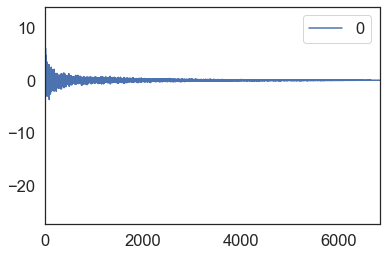

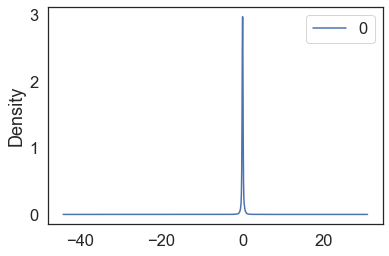

                 0
count  6824.000000
mean      0.015756
std       0.523756
min     -25.478190
25%      -0.042757
50%       0.006434
75%       0.050102
max      12.056132


<Figure size 432x288 with 0 Axes>

In [50]:
Video_games_sales_Vis__6 = np.asarray(Video_games_sales['NA_Sales'])
model = ARIMA(Video_games_sales_Vis__6, order=(6,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
plt.savefig('')
print(residuals.describe())


In [26]:
Video_games_sales_Vis = pd.read_csv('Vgsales.csv')
Video_games_sales_Vis.isnull().sum()
Video_games_sales_Vis = Video_games_sales_Vis.dropna()
Video_games_sales_Vis['Year'] = Video_games_sales_Vis['Year'].astype(int)
Video_games_sales_Vis["Platform" ] = Video_games_sales_Vis["Platform"].replace(
    ["GB", "NES", "DS", "X360", "SNES", "GBA", "3DS", "N64", "PS", "XB",
     "XOne", "PSV", "TG16", "3DO", "PCFX"],
    ["Game Boy", "Nintendo Entertainment System", "Nintendo DS", "Xbox 360",
     "Super Nintendo Entertainment System",
     "Nintendo Game Boy Advance", "Nintendo 3DS", "Nintendo 64","PlayStation",
     "Xbox","Xbox One", "PlayStation Vita", "TurboGrafx-16",
     "3DO Interactive Multiplayer", "NEC PC‑FX"])
Video_games_sales_Vis.loc[Video_games_sales_Vis['Name'] == "FIFA Soccer 13", "Genre"] = "Sports"

In [27]:
def ProductFamily (c):
    if c['Platform'] in PlayStation:
        return 'PlayStation'
    elif c['Platform'] in Nintendo:
        return 'Nintendo'
    elif c['Platform'] in Microsoft:
        return 'Microsoft'
    elif c['Platform'] in Other:
        return 'Other'
    else:
        return 'o'

Video_games_sales_Vis['ProductFamily'] = Video_games_sales_Vis.apply(ProductFamily, axis=1)

In [28]:
def x_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = tick_val/1000
        return '${0:.1f}B'.format(val)
    elif tick_val > 1:
        val = int(tick_val)
        return '${:d}M'.format(val)
    else:
        return tick_val
    
def y_fmt(tick_val, pos): 
    if tick_val >= 1000:
        val = tick_val/1000
        return '${0:.1f}B'.format(val)
    elif tick_val > 1:
        val = int(tick_val)
        return '${:d}M'.format(val)
    else:
        return tick_val

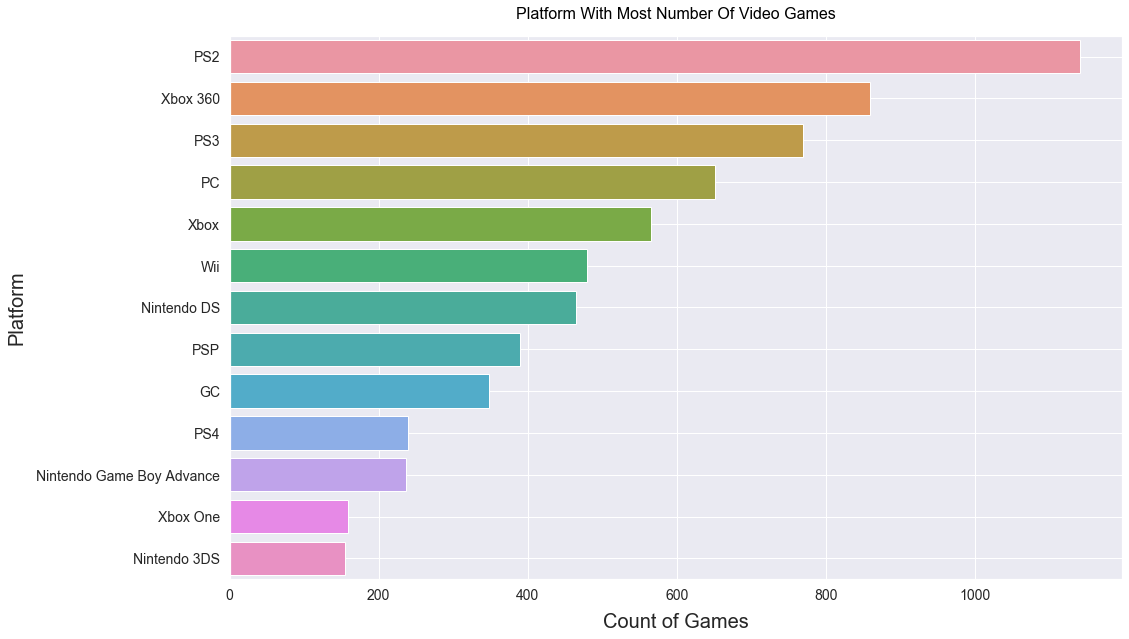

<Figure size 432x288 with 0 Axes>

In [51]:
sns.set_style("darkgrid")
num_games=Video_games_sales_Pred.groupby('Platform').size().sort_values(ascending=False).reset_index()[:13]
num_games.columns=['Platform', 'Count Of Games']
plt.figure(figsize=(16,10))
sns.barplot(y=num_games["Platform"], x=num_games["Count Of Games"], linewidth=1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Platform", labelpad=10, fontsize=20)
plt.xlabel("Count of Games", labelpad=10, fontsize=20)
plt.grid(True)
plt.title("Platform With Most Number Of Video Games", color='Black', fontsize= 16, y=1.02)
plt.show()
plt.savefig('');

In [30]:
GenreGroup = Video_games_sales_Vis.groupby(['Genre']).sum().loc[:, 'NA_Sales': 'Global_Sales'].round().astype(int)
GenreGroup['NA_Sales%'] = GenreGroup['NA_Sales']/GenreGroup['Global_Sales']
GenreGroup['EU_Sales%'] = GenreGroup['EU_Sales']/GenreGroup['Global_Sales']
GenreGroup['JP_Sales%'] = GenreGroup['JP_Sales']/GenreGroup['Global_Sales']
GenreGroup['Other_Sales%'] = GenreGroup['Other_Sales']/GenreGroup['Global_Sales']

In [31]:
GenreGroupSales=GenreGroup.loc[:, 'NA_Sales': 'Other_Sales'].reset_index()
GenreGroupSales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,859,506,158,182
1,Adventure,102,64,52,17
2,Fighting,221,100,87,36
3,Misc,397,212,107,74
4,Platform,446,201,131,52
5,Puzzle,122,51,57,12
6,Racing,357,236,57,77
7,Role-Playing,326,188,350,59
8,Shooter,575,310,38,102
9,Simulation,182,113,64,31


In [32]:
Genre=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing',
       'Shooter', 'Simulation', 'Sports', 'Strategy']
RegionSales=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
GenreGroup=GenreGroup.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe","JP_Sales":"Japan","Other_Sales":"Other"})

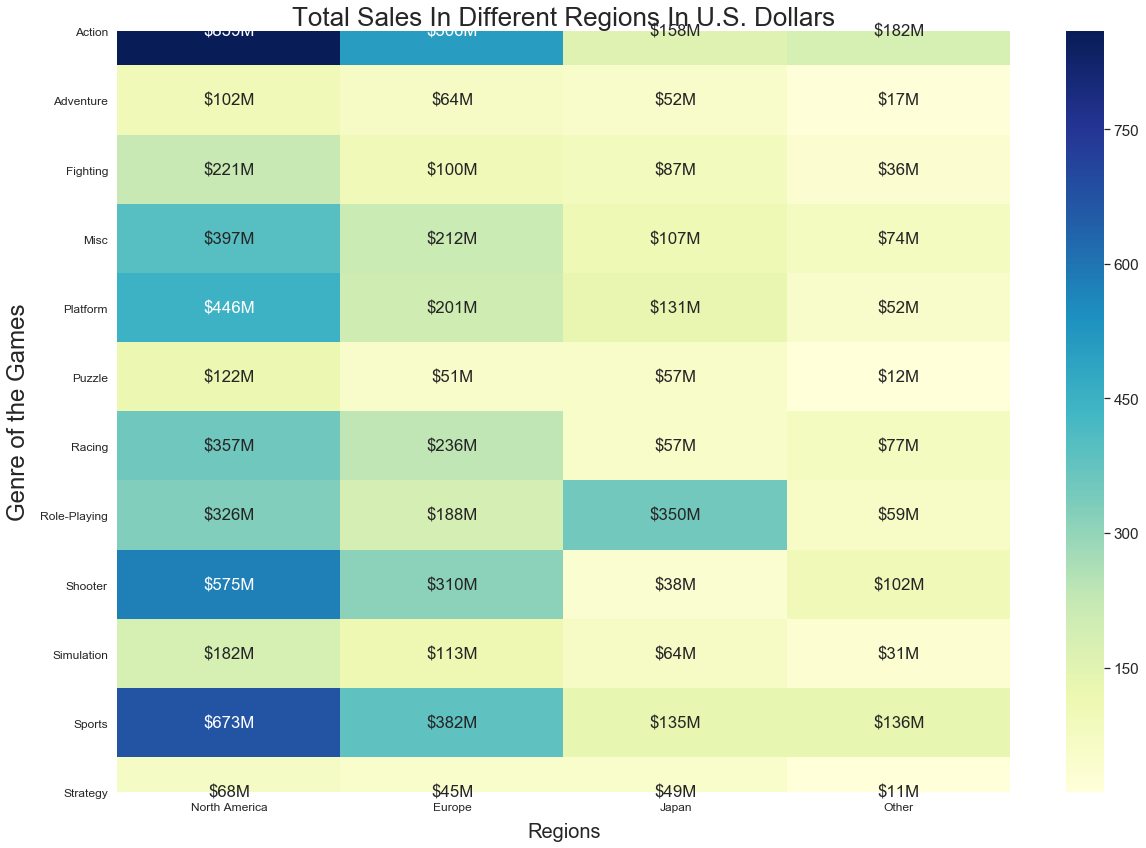

<Figure size 432x288 with 0 Axes>

In [52]:
sns.set_context("poster")
plt.figure(figsize=(20, 14))
sns.set(font_scale=1.4)
ax=sns.heatmap(GenreGroup.loc[:, 'North America': 'Other'], annot=True, fmt = '.0f',cmap="YlGnBu")
for t in ax.texts: t.set_text("$"+t.get_text() + "M")
plt.title("Total Sales In Different Regions In U.S. Dollars", y=1.00, fontsize=26)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Regions", labelpad=10, fontsize=20)
plt.ylabel("Genre of the Games", labelpad=10, fontsize=24)
plt.show()
plt.savefig('');

In [34]:
GenreGroup=GenreGroup.rename(index=str, columns={"NA_Sales%": "North America Sales%",
                                                 "EU_Sales%": "Europe Sales%",
                                                 "JP_Sales%": "Japan Sales%", 
                                                 "Other_Sales%": "Other Sales%"})

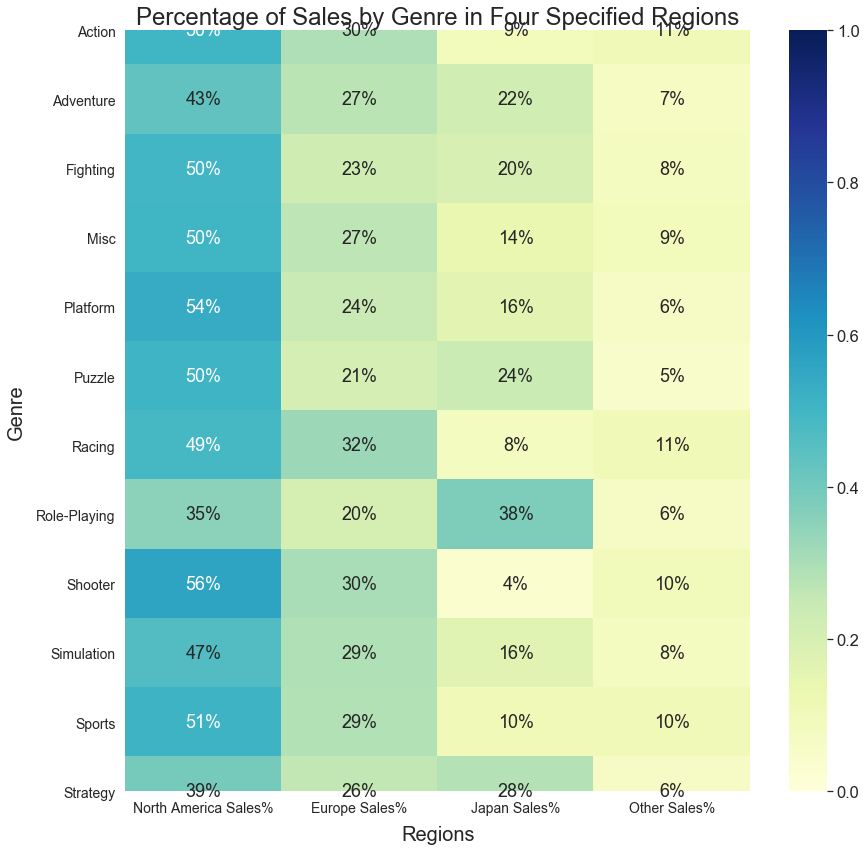

<Figure size 432x288 with 0 Axes>

In [53]:
sns.set_context("poster")
plt.figure(figsize=(14, 14))
sns.set(font_scale=1.5)
sns.heatmap(GenreGroup.loc[:,'North America Sales%': 'Other Sales%'], vmax=1, vmin=0, annot=True, 
            fmt = '.0%',cmap="YlGnBu")
plt.title("Percentage of Sales by Genre in Four Specified Regions", y=1.02, fontsize=24)
plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14 )
plt.xlabel("Regions", labelpad=10, fontsize=20)
plt.ylabel("Genre", labelpad=10, fontsize=20)
plt.show()
plt.savefig('');

In [36]:
Sports=Video_games_sales_Vis[Video_games_sales_Vis.Genre == 'Sports']
Actions=Video_games_sales_Vis[Video_games_sales_Vis.Genre == "Action"]

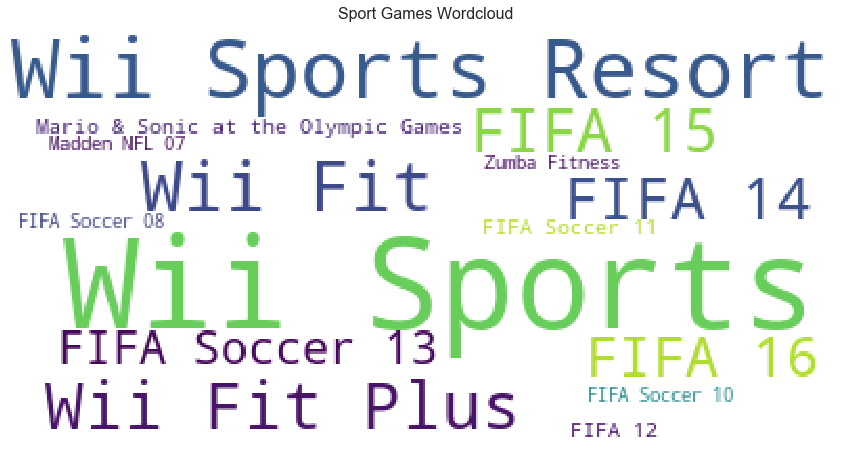

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(15,15))
Sportsale=Sports.groupby('Name')['Global_Sales'].sum().sort_values(ascending = False).to_dict()
wc=WordCloud(
    background_color='white',
    max_words=15,
    max_font_size=60).generate_from_frequencies(Sportsale)
plt.imshow(wc)
plt.title("Sport Games Wordcloud", fontsize=16, y=1.02)
plt.axis("off")
plt.show()
plt.savefig('');

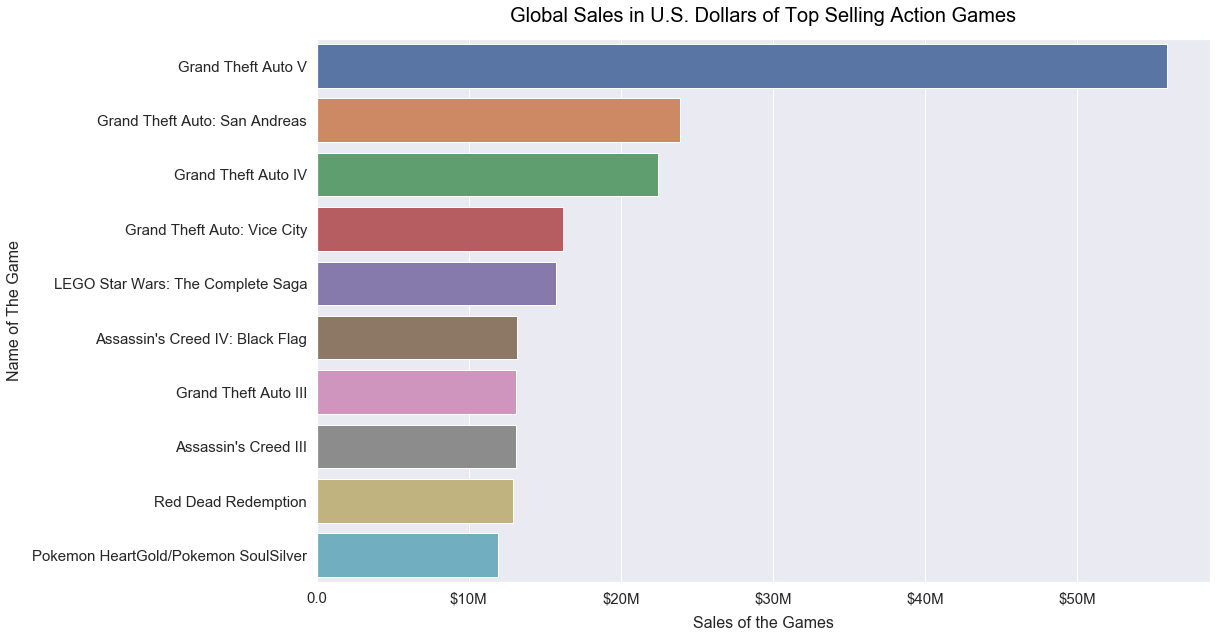

<Figure size 432x288 with 0 Axes>

In [54]:
topsales=Actions.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (16,10))
sns.barplot(y=topsales["Name"], x=topsales["Global_Sales"], linewidth=1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Name of The Game", labelpad=10, fontsize=16)
plt.xlabel("Sales of the Games", labelpad=10, fontsize=16)
plt.title("Global Sales in U.S. Dollars of Top Selling Action Games", color='Black', fontsize=20, y=1.02)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.show()
plt.savefig('');

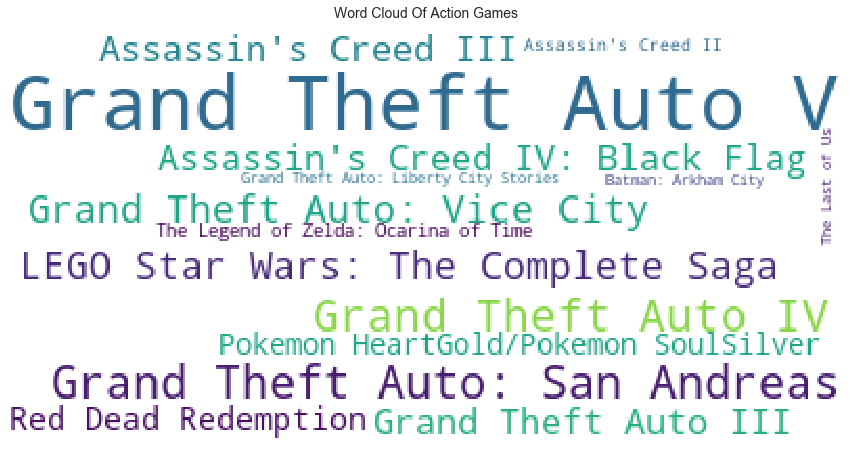

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(15,15))
Actionsale=Actions.groupby('Name')['Global_Sales'].sum().sort_values(ascending = False).to_dict()
wc=WordCloud(
    background_color='white',
    max_words=15,
    max_font_size=60 
    ).generate_from_frequencies(Actionsale)
plt.imshow(wc)
plt.title("Word Cloud Of Action Games", fontsize=14, y=1.02)
plt.axis("off")
plt.show()
plt.savefig('');

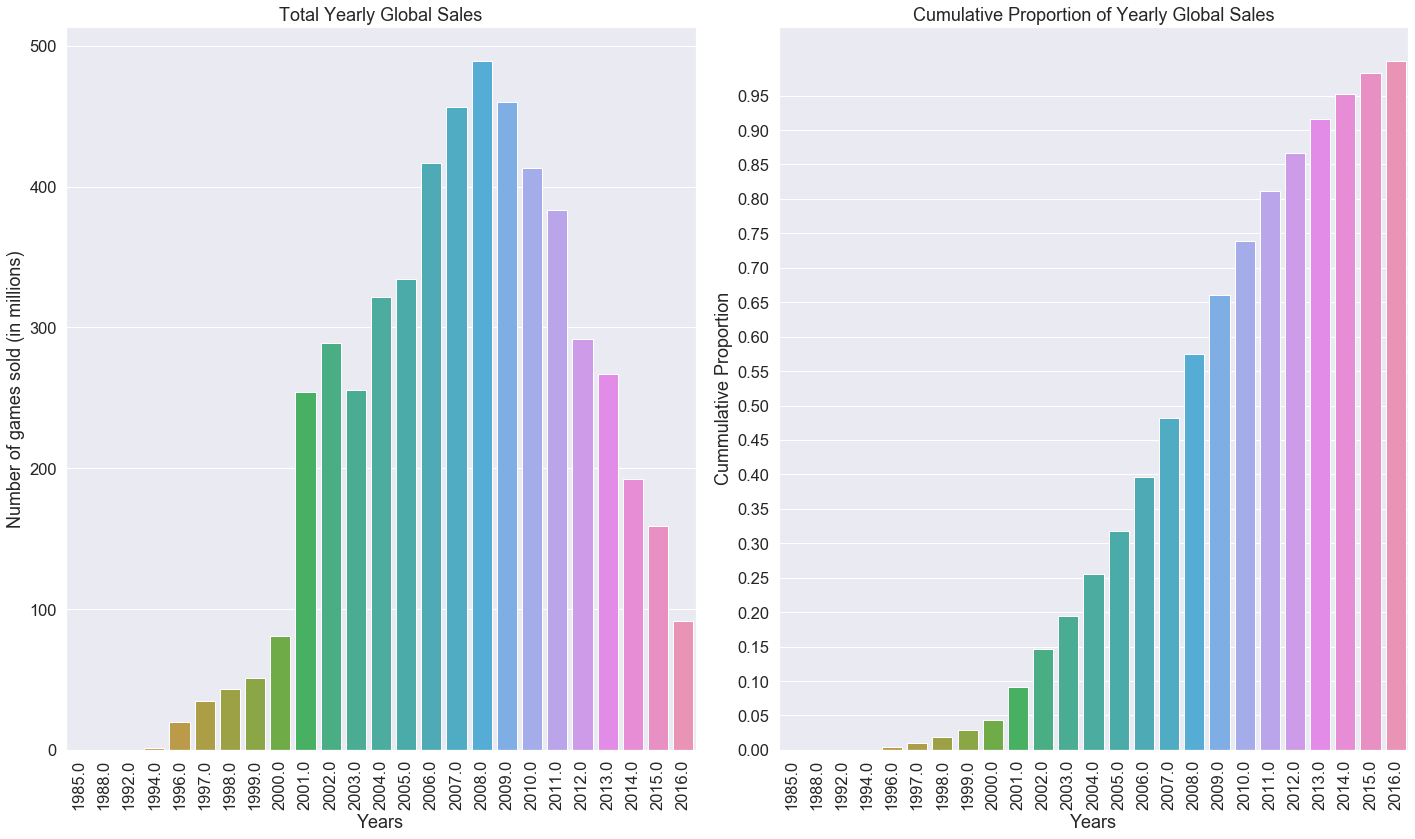

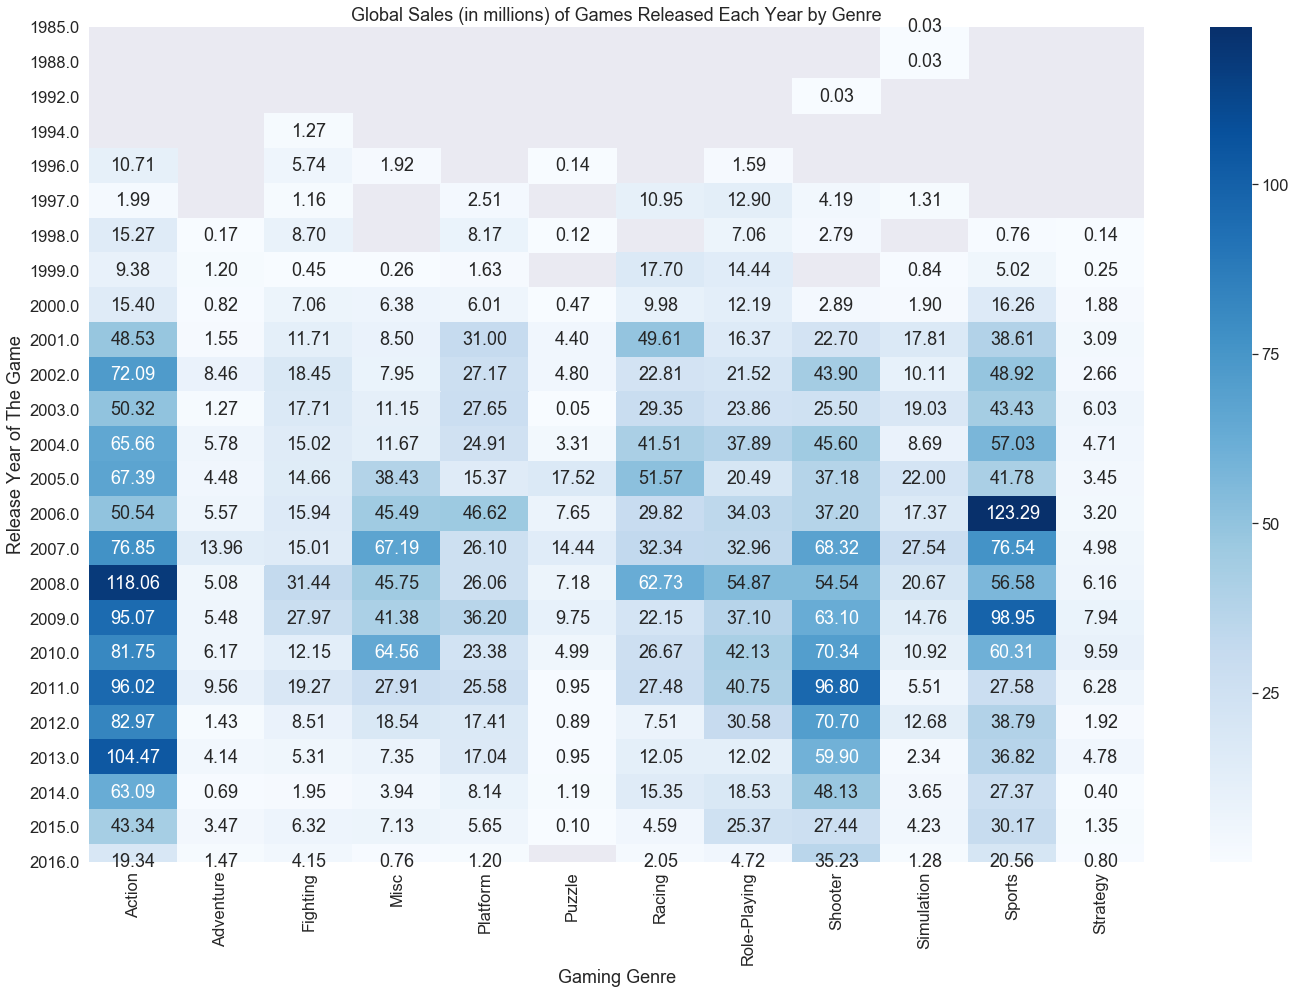

<Figure size 432x288 with 0 Axes>

In [57]:
Sales_by_Gen_and_Yr = pd.pivot_table(Video_games_sales_Pred,index=['Year_of_Release'],
                     columns=['Genre'],values=['Global_Sales'],aggfunc=np.sum)
Sales_by_Gen_and_Yr.columns = Sales_by_Gen_and_Yr.columns.get_level_values(1)
Yearly_Tots = Sales_by_Gen_and_Yr.sum(axis=1)
Yearly_Tots = Yearly_Tots.sort_index()
YT1_cumsum = Yearly_Tots.cumsum()/Yearly_Tots.sum()
fig = plt.figure(figsize=(20,12))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(y = Yearly_Tots.values, x = Yearly_Tots.index,ax=ax1)
ax1.set_title('Total Yearly Global Sales')
plt.setp(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of games sold (in millions)')

sns.barplot(y = YT1_cumsum.values, x = YT1_cumsum.index, ax=ax2)
ax2.set_title('Cumulative Proportion of Yearly Global Sales')
plt.setp(ax2.get_xticklabels(),rotation=90)
ax2.set_xlabel('Years')
ax2.set_ylabel('Cummulative Proportion')
ax2.yaxis.set_ticks(np.arange(0,1,0.05))
fig.tight_layout()
plt.figure(figsize=(20,14))
sns.heatmap(Sales_by_Gen_and_Yr,annot = True, fmt = '.2f', cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Release Year of The Game')
plt.xlabel('Gaming Genre')
plt.title('Global Sales (in millions) of Games Released Each Year by Genre')
plt.show()
plt.savefig('')

In [41]:
SaleByYear=Video_games_sales_Vis.groupby('Year')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
                              'Global_Sales'].sum().reset_index()
SaleByYear=SaleByYear[SaleByYear.Year<2017]
SaleByYear=SaleByYear.rename(index=str, columns={"NA_Sales": "North America", 
                "EU_Sales": "Europe", "JP_Sales":"Japan", "Other_Sales":"Other"})

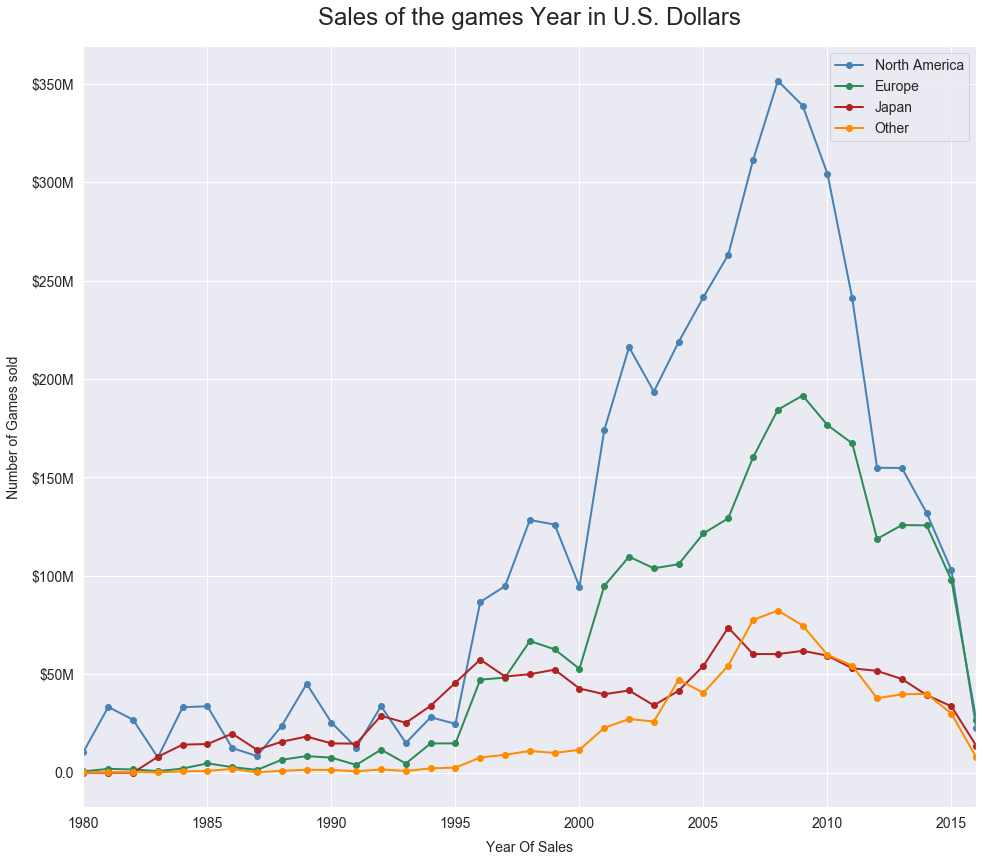

<Figure size 432x288 with 0 Axes>

In [58]:
SaleByYear.set_index('Year')[['North America', 'Europe', 'Japan', 'Other']].plot(style='-o', 
    color=('steelblue', "seagreen", "firebrick", "darkorange"), figsize=(16, 14), linewidth=2)
plt.title("Sales of the games Year in U.S. Dollars", fontsize=24, y=1.02)
plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14 )
plt.xlabel("Year Of Sales", fontsize=14, labelpad=10)
plt.ylabel("Number of Games sold", fontsize=14, labelpad=10)
plt.legend(fontsize=14)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
plt.show()
plt.savefig('');

In [43]:
before2011=Video_games_sales_Vis[(Video_games_sales_Vis["Year"]>=2005) & (Video_games_sales_Vis["Year"]<2011)].groupby("ProductFamily")['Global_Sales'].sum().sort_values(ascending = False).reset_index()
after2011=Video_games_sales_Vis[(Video_games_sales_Vis["Year"]>=2011) & (Video_games_sales_Vis["Year"]<2017)].groupby("ProductFamily")['Global_Sales'].sum().sort_values(ascending = False).reset_index()
combined=pd.merge(before2011, after2011, on="ProductFamily")
combined=combined.rename(index=str, columns={"Global_Sales_x": "2005-2010 Sales", "Global_Sales_y": "2011-2016 Sales"})

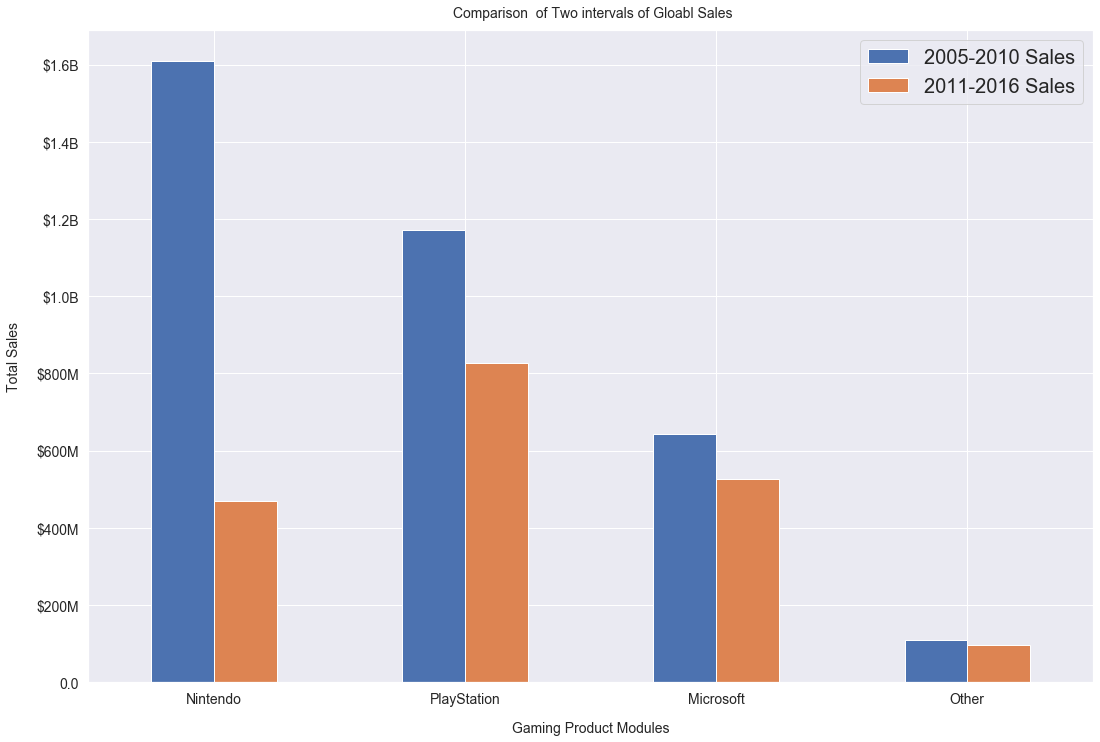

In [59]:
sns.set_style("darkgrid")
combined.set_index('ProductFamily')[['2005-2010 Sales', '2011-2016 Sales']].plot(kind='bar', 
                                                                figsize=(18, 12))
plt.xticks(rotation=0)
plt.title(" Comparison  of Two intervals of Gloabl Sales", fontsize=14, y=1.01)
plt.xlabel("Gaming Product Modules", fontsize=14, labelpad=15)
plt.ylabel("Total Sales", fontsize=14, labelpad=15)
plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14 )
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
plt.legend(fontsize=20)
plt.savefig('');

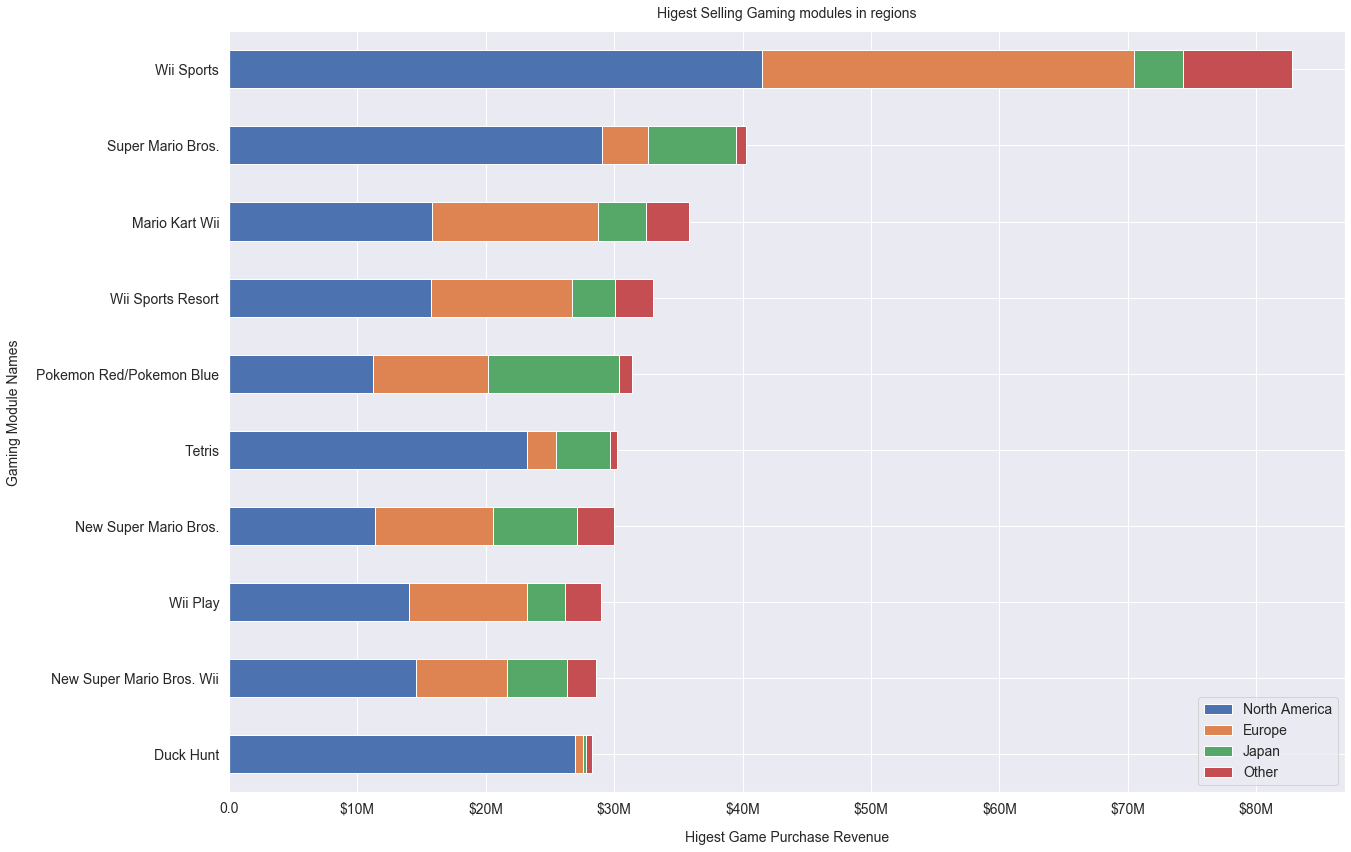

In [60]:
Video_games_sales_Vis_1=Video_games_sales_Vis.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe",
                                  "JP_Sales": "Japan","Other_Sales": "Other"})
Video_games_sales_Vis_1=Video_games_sales_Vis_1.loc[:, 'Name': 'Global_Sales'].sort_values(by="Global_Sales", ascending=True).tail(10)
sns.set_style("darkgrid")
ax=Video_games_sales_Vis_1.set_index('Name')[['North America', 'Europe', 'Japan', 'Other']].plot(kind='barh',
figsize=(20, 14), stacked=True)
plt.title("Higest Selling Gaming modules in regions", fontsize=14, y=1.01)
plt.xlabel("Higest Game Purchase Revenue", fontsize=14, labelpad=15)
plt.ylabel("Gaming Module Names", fontsize=14, labelpad=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.legend(fontsize=14)
plt.savefig('');